<img src="https://cdn-icons-png.flaticon.com/512/784/784856.png" alt="Telecom Churn" style="width: 70px; float:left; margin-right:8px"><b><p style='font-size:24px'><font color='#808080'>Agenda - Revision Topics</font></p></b></img>

---
* Regularisarion
* Model Selection
* Decision Trees
* Random Forest
* Time Series
* PCA
* Python Coding

<img src="https://cdn-icons-png.flaticon.com/512/5359/5359804.png" alt="Telecom Churn" style="width: 70px; float:left; margin-right:8px"><b><p style='font-size:24px'><font color='#808080'>Learning by Example - Social Network Ads Dataset</font></p></b></img>

---

* Hands-On Experience

In [1]:
# Import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from time import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data set
ads_df = pd.read_csv('Social_Network_Ads.csv')
ads_df.shape

(400, 5)

In [3]:
# View top 5 rows
ads_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Check duplicate records
len(ads_df['User ID'].unique())

400

In [5]:
# Drop "User ID" feature
ads_df.drop('User ID', axis=1, inplace=True)

In [6]:
# Check feature data types
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [7]:
# Check feature data types
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [8]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
ads_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
90%,52.100000,122000.000000,1.000000
95%,57.050000,137050.000000,1.000000
99%,60.000000,148010.000000,1.000000


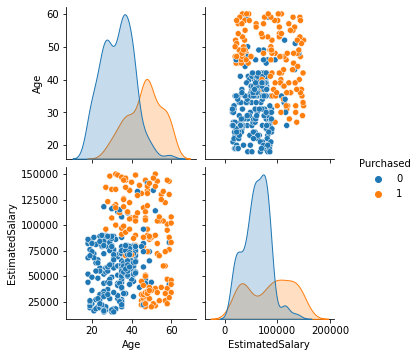

In [9]:
# Plotting pair plots of features
sns.pairplot(ads_df, hue='Purchased')
plt.show()

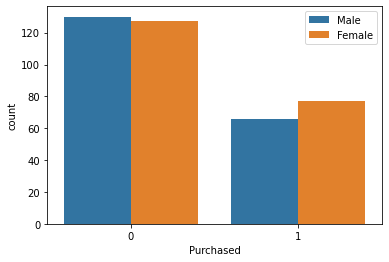

In [10]:
# Analyse ads purchased by gender
sns.countplot(data=ads_df, x=ads_df.Purchased, hue='Gender')
plt.legend(loc='best')
plt.show()

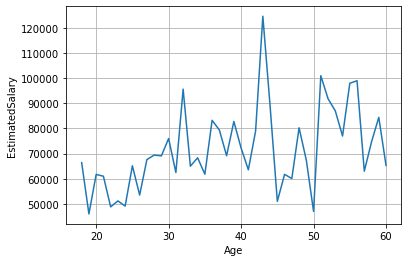

In [11]:
# Analyse estimated salary by age
sns.lineplot(data=ads_df, x=ads_df.Age, y=ads_df.EstimatedSalary, ci=None)
plt.grid()
plt.show()

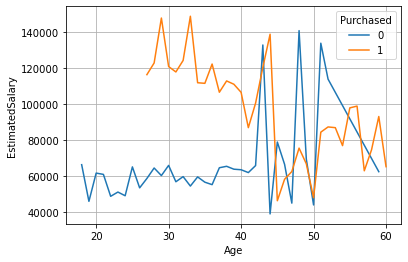

In [12]:
# Analyse estimated salary for purchased ads by age
sns.lineplot(data=ads_df, x=ads_df.Age, y=ads_df.EstimatedSalary, hue='Purchased', ci=None)
plt.grid()
plt.show()

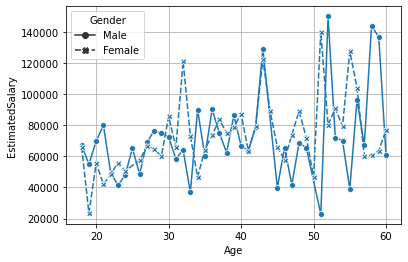

In [13]:
# Analyse estimated salary by age and gender
sns.lineplot(data=ads_df, x=ads_df.Age, y=ads_df.EstimatedSalary, style=ads_df.Gender, markers=True, ci=None)
plt.grid()
plt.show()

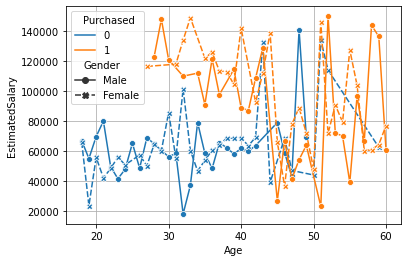

In [14]:
# Analyse estimated salary for purchased ads by age and gender 
sns.lineplot(data=ads_df, x=ads_df.Age, y=ads_df.EstimatedSalary, style=ads_df.Gender, hue='Purchased', markers=True, ci=None)
plt.grid()
plt.show()

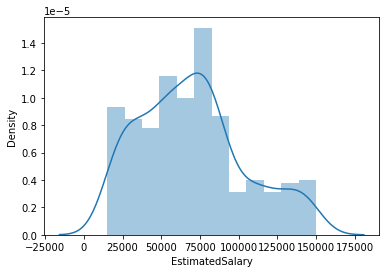

In [15]:
# Check estimated salary distribution
sns.distplot(ads_df.EstimatedSalary)
plt.show()

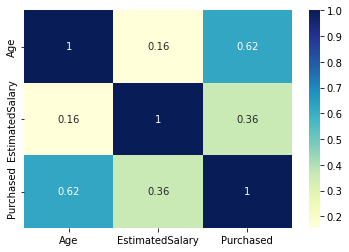

In [16]:
# View features correlation heatmap
sns.heatmap(ads_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [17]:
# Analyse "Gender" feature
ads_df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [18]:
# Encode categorical feature (Female->0, Male->1)
label_encoder = LabelEncoder()
ads_df.Gender = label_encoder.fit_transform(ads_df.Gender)
ads_df.Gender.value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [19]:
# Helper function to check outliers
def check_outliers(features, n_cols=4):
    n_rows = (len(features) + n_cols - 1)//n_cols
    fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(7.5*n_cols, 5*n_rows), sharey=True)
    axes_it = axes.flat
    for feature, ax in zip(features, axes_it):
        ax.set_title(f'Plotting Feature: {feature}', fontsize=20)
        sns.boxplot(ads_df[feature], ax=ax)
        ax.set_xlabel(feature, fontsize=16)
    for ax in axes_it:
        ax.axis('off')
    fig.tight_layout()
    plt.show()

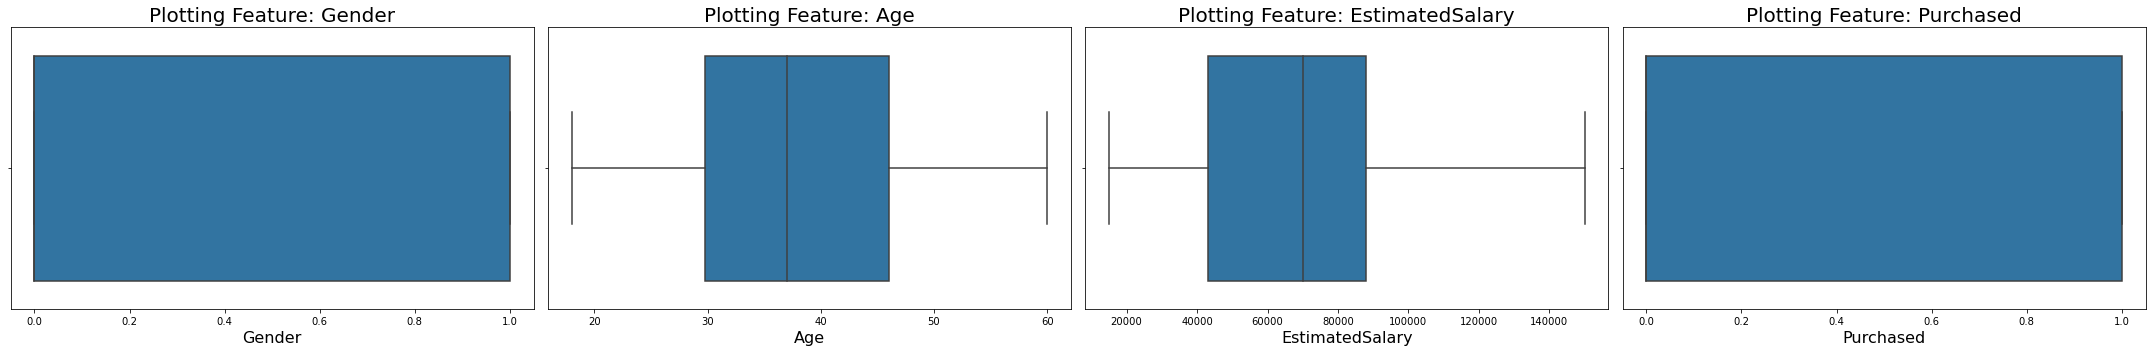

In [20]:
# Analyse features for outliers
check_outliers(ads_df.columns)

In [21]:
# Putting predictors to X
X = ads_df.drop('Purchased', axis=1)

In [22]:
# Putting response feature to y
y = ads_df['Purchased']

In [23]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [24]:
# Check shape of train and test set
X_train.shape, X_test.shape

((280, 3), (120, 3))

In [25]:
# Perform feature scaling
scaler = StandardScaler()
features_to_scale = [col for col in ads_df.columns if col != 'Purchased']
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

<img src="https://cdn-icons-png.flaticon.com/512/1809/1809086.png" alt="Telecom Churn" style="width: 70px; float:left; margin-right:8px"><b><p style='font-size:24px'><font color='#808080'>Decision Trees</font></p></b></img>

---
* High Variance Model: Because they highly overfit the train data
* If hyperparameter of model is not controlled then there is high likelyhood that decision tree will have zero train error. The resulting model could be very complex or basically we end up getting overfit model.

<b><font color='#3d4446' style='font-size:16px'>Advantages</font></b>
* Easy to understand
* Work for both continous & categorical data
* Non-Parametric Method: They don't have any assumption of data before we apply them
* Easy to interpret hence useful in data exploration

<b><font color='#3d4446' style='font-size:16px'>Disadvantages</font></b>
* Tendency to overfit
* Not good for continous variables

In [26]:
# Importing require packages 
from sklearn.tree import DecisionTreeClassifier

In [27]:
# Create decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=4)

In [28]:
# Fitting model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [29]:
# Get prediction on train and test set
y_train_pred_dt = dt_classifier.predict(X_train)
y_test_pred_dt = dt_classifier.predict(X_test)

In [30]:
# View classification report
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        75
           1       0.92      0.78      0.84        45

    accuracy                           0.89       120
   macro avg       0.90      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120



#### Plot the ROC curve

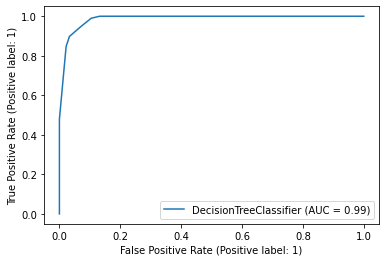

In [31]:
# Plot ROC AUC curve
plot_roc_curve(dt_classifier, X_train, y_train, drop_intermediate=False)
plt.show()

### Hyper-parameter tuning for the Decision Tree

In [32]:
# Create decision tree estimator
dt_estimator = DecisionTreeClassifier(random_state=42)

In [33]:
# Grid search parameters
params = {
    "max_depth": [2, 3, 5, 10, 20],
    "min_samples_leaf": [5, 10, 20, 50, 100, 500]
}

In [34]:
# Define grid search
grid_search = GridSearchCV(estimator=dt_estimator,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring='roc_auc')

In [35]:
# Perform grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='roc_auc', verbose=1)

In [36]:
# Get best score
grid_search.best_score_

0.9487880434782608

In [37]:
# View best estimator
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

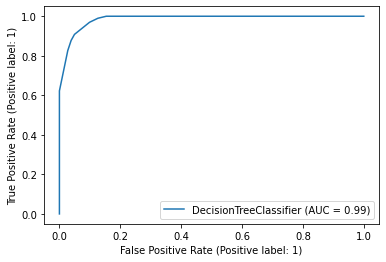

In [38]:
# Plotting curve
plot_roc_curve(grid_search.best_estimator_, X_train, y_train)
plt.show()

<img src="https://cdn-icons-png.flaticon.com/512/1070/1070250.png" alt="Telecom Churn" style="width: 70px; float:left; margin-right:8px"><b><p style='font-size:24px'><font color='#808080'>Ensemble Learning</font></p></b></img>

---

When you want to purchase a new car, will you walk up to the first car shop and purchase one based on the advice of the dealer? It’s highly unlikely.

You would likely browser a few web portals where people have posted their reviews and compare different car models, checking for their features and prices. You will also probably ask your friends and colleagues for their opinion. In short, you wouldn’t directly reach a conclusion, but will instead make a decision considering the opinions of other people as well.

* Simple Ensemble Techniques
    * Max Voting
    * Averaging
    * Weighted Averaging
* Advanced Ensemble Techniques
    * Stacking
    * Blending
    * Bagging
    * Boosting
* Bagging Algorithms
    * Random Forest
    * Bagging Meta-Estimator
* Boosting Algorithms
    * AdaBoost
    * GBM
    * XGBM
    * Light GBM
    * CatBoost

<img src="https://cdn-icons-png.flaticon.com/512/1809/1809086.png" alt="Telecom Churn" style="width: 70px; float:left; margin-right:8px"><b><p style='font-size:24px'><font color='#808080'>Random Forest</font></p></b></img>

---
* Random forest is a <i><b>Supervised Machine Learning Algorithm</b></i> that is used widely in <b>Classification</b> and <b>Regression</b> problems. 
* It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

---
* Works on Bagging concept
    * Bootstrap
    * Aggregation
* In `Random Forest` we try to reduce overfitting by adding bias to the model
* Example scenario, if you are selecting leader of a village, then which option you will select,
    * Ask on very intelligent person? (one good great model)
    * Ask many normal villagers? (many weaker models)
* Better option for this scenario would be,
    - [ ] Ask on very intelligent person
    - [x] Ask many normal villagers
* Basic idea of `Random Forest` is to use multiple weak models to come up with decision

In [39]:
# Import required package
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Create random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=100, oob_score=True)

In [41]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=10, oob_score=True,
                       random_state=100)

In [42]:
rf_classifier.oob_score_

0.8714285714285714

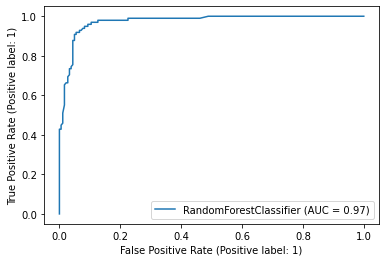

In [43]:
plot_roc_curve(rf_classifier, X_train, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [44]:
rf_estimator = RandomForestClassifier(random_state=42, n_jobs=-1)

In [45]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'n_estimators': [10, 25, 50, 100]
}

In [46]:
grid_search = GridSearchCV(estimator=rf_estimator,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring='roc_auc')

In [47]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='roc_auc', verbose=1)

In [48]:
grid_search.best_score_

0.9546841787439614

In [49]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

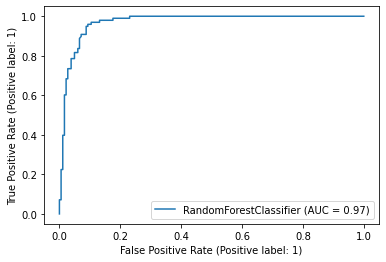

In [50]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [51]:
rf_best.feature_importances_

array([0.00671723, 0.55441387, 0.43886891])

In [52]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [56]:
imp_df.sort_values(by="Imp", ascending=False)
imp_df.set_index('Varname', inplace=True)

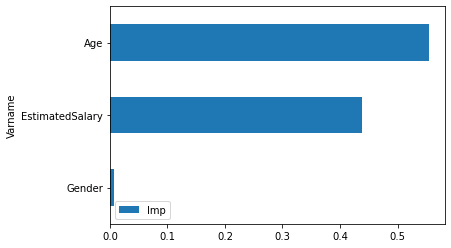

In [57]:
imp_df.sort_values(by='Imp').plot(kind='barh')
plt.show()

<img src="https://cdn-icons-png.flaticon.com/512/850/850960.png" alt="Telecom Churn" style="width: 70px; float:left; margin-right:8px"><b><p style='font-size:24px'><font color='#808080'>Time Series</font></p></b></img>

---
* Missing Value Treatment
    * Mean Imputation
    * Last Observation Carried Forward
    * Linear Interpolation
    * Seasonal (<i>average of corresponding data points in the previous period and the next seasonal period</i>) + Linear Interpolation
    
* Compute Error: MAPE (Mean Absolute Percentage Error)

$$\mathcal{{MAPE} =\frac{100}{n} {\sum_{i=0}^n \vert \frac{y_i - \hat y_i}{y_i}\vert}}$$

### Example Dataset

Here n = 4,

||$${y_i}$$|$$\hat {y_i}$$|
|---|---|---|
|1|12|14|
|2|15|12|
|2|11|11|
|2|15|16|

$$\mathcal{{MAPE} =\frac{100}{4}[\vert \frac{12 - 14}{12}\vert + \vert \frac{15 - 12}{15}\vert + \vert \frac{11 - 11}{11}\vert + \vert \frac{15 - 16}{15}\vert  ]}$$

$$\mathcal{{MAPE} = \frac{100}{4}[{0.44}]}$$

$$\mathcal{{MAPE} = {11}}$$

### p, q & d Values

* Use ACF & PACF to identify p (from PACF plot), q (from ACF plot) values
* d value is basically order of differencing or lag in difference series

### Stationory Time Series
* If the statistical properties of the time series doesn't change with time within a fixed interval


### Moving Average Process
|t|$$\hat {y_t}$$|$${\epsilon_t}$$|$${y_t (actual)}$$|
|---|---|---|---|
|1|||27|
|2|||32.5|
|3|||30|
|4|||30|
|5|||33.5|

First prediction will be average of all data points,

${\mu = {\frac{27 + 32.5 + 30 + 30 + 33.5}{5}} = {30}}$

|t|$$\hat {y_t}$$|$${\epsilon_t}$$|$${y_t (actual)}$$|
|---|---|---|---|
|1|30||27|
|2|||32.5|
|3|||30|
|4|||30|
|5|||33.5|

Compute error,

${\epsilon_t} = {y_t} - {\hat {y_t}}$


${\epsilon_t} = {27} - {30} = {-3}$

|t|$$\hat {y_t}$$|$${\epsilon_t}$$|$${y_t (actual)}$$|
|---|---|---|---|
|1|30|-3|27|
|2|||32.5|
|3|||30|
|4|||30|
|5|||33.5|

Next prediction onwards,

Let's assume ${\phi = 0.5}$,

${\hat {y_t} = \mu + \phi \epsilon_{t-1}}$

$\hat {y_t} = {30} + {(0.5)}{.}{(-3)}$

|t|$$\hat {y_t}$$|$${\epsilon_t}$$|$${y_t (actual)}$$|
|---|---|---|---|
|1|30|-3|27|
|2|28.3||32.5|
|3|||30|
|4|||30|
|5|||33.5|

Similarly following this pattern we will complete entire table,

|t|$$\hat {y_t}$$|$${\epsilon_t}$$|$${y_t (actual)}$$|
|---|---|---|---|
|1|30|-3|27|
|2|28.3|4|32.5|
|3|32|-2|30|
|4|29|1|30|
|5|30.5|3|33.5|

<img src="https://cdn-icons-png.flaticon.com/512/2628/2628263.png" alt="Telecom Churn" style="width: 70px; float:left; margin-right:8px"><b><p style='font-size:24px'><font color='#808080'>Principal Component Analysis</font></p></b></img>

---

* Linear combination of our original features
* All PC's are orthogonal to each other
    * 1st PC will explain maximum variance
    * 2nd PC will explain second maximum variance
    * ...
    * So on till total explained variance of PC becomes equal to 100
    
### Example
|PC|Explained Variance (%)|
|---|---|
|1|38|
|2|23|
|3|17|
|4|11|
|5|6|
|6|3|
|7|2|

So how much variace explained by first 4 PC's will be = 38 + 23 + 17 + 11 = 89%

<img src="https://cdn-icons-png.flaticon.com/512/5968/5968350.png" alt="Telecom Churn" style="width: 70px; float:left; margin-right:8px"><b><p style='font-size:24px'><font color='#808080'>Python Coding</font></p></b></img>

---

* Loops
* Basic Computation
* Expect Basic Python Questions on Logic Implementation

### Print "A" intution/logic building

$${columns \Downarrow}$$
$${second loop}$$

||0|1|2|3|4|5|
|---|---|---|---|---|---|---|
|0|   | * | * |   |
|1| * |   |   | * |
|2| * |   |   | * |
|3| * | * | * | * |
|4| * |   |   | * |
|5| * |   |   | * |
|6|   |   |   |   |
|7|   |   |   |   |

$${first loop}$$
$${rows \Longrightarrow}$$

#### First Loop
* Till how long it need to run to comlete the pattern i.e. how many rows we have in pattern 
* In this case we have 6 rows so loop will run till index 5
* `for i in range(6)`

#### Second Loop
* Till how long it need to run to comlete the pattern i.e. how many columns we have in pattern
* In this case we have 4 columns so loop will run till index 3
* `for j in range(4)`

In [61]:
# Print "A" code
for i in range(6):
    for j in range(4):
        if (j == 0 or j == 3) and (i != 0):
            print('*', end='')
        elif (i == 0 or i ==3) and (j != 0 and j != 3):
            print('*', end='')
        else:
            print(end=' ')
    print('')

 ** 
*  *
*  *
****
*  *
*  *


#### Print B/8


|i/j|0|1|2|3|4|5|
|---|---|---|---|---|---|---|
|0| * | * | * | * |
|1| * |   |   | * |
|2| * |   |   | * |
|3| * | * | * | * |
|4| * |   |   | * |
|5| * |   |   | * |
|6| * | * | * | * |
|7|   |   |   |   |

In [108]:
# Print "B" code
for i in range(7):
    for j in range(4):
        if (j == 0 or j == 3) or (i == 0 or i == 6):
            print('*', end='')
        elif (i == 0 or i ==3) and (j != 0 and j != 3):
            print('*', end='')
        else:
            print(end=' ')
    print('')

****
*  *
*  *
****
*  *
*  *
****


#### Print C


|i/j|0|1|2|3|4|5|
|---|---|---|---|---|---|---|
|0| * | * | * | * |
|1| * |   |   |   |
|2| * |   |   |   |
|3| * |   |   |   |
|4| * |   |   |   |
|5| * |   |   |   |
|6| * | * | * | * |
|7|   |   |   |   |

In [145]:
# Print "C"
for i in range (7):
    for j in range(4):
        if (j == 0) or (i == 0 or i == 6):
            print('*', end='')
    print('')

****
*
*
*
*
*
****


In [116]:
for i in range(4):
    for j in range(4):
        if (j == 0 or j == 3) or (i == 0):
            print(0, end='')
        elif (i == 0 or i ==3) and (j != 0 and j != 3):
            print(0, end='')
        else:
            print(1, end='')
    print('')

0000
0110
0110
0000


In [140]:
# Find GCD implementation
def get_GCD(num_x, num_y):
    min_num = min(num_x, num_y)
    common_factors = []
    for number in range(2, min_num):
        if num_x%number == 0 and num_y%number == 0:
            common_factors.append(number)
    return max(common_factors) if len(common_factors) > 0 else 'None'

In [141]:
# Find GDC
get_GCD(12, 8)

4

In [142]:
# Find GDC
get_GCD(45, 86)

'None'

In [136]:
def get_factors(inp_number):
    factors = []
    for number in range(1, inp_number + 1):
        if inp_number%number == 0:
            factors.append(number)
    return factors

In [139]:
get_factors(21)

[1, 3, 7, 21]

In [143]:
def get_LCM(num_x, num_y):
    return (num_x * num_y)//get_GCD(num_x, num_y)

In [144]:
get_LCM(12, 8)

24

<img src="https://cdn-icons-png.flaticon.com/512/2271/2271605.png" alt="Telecom Churn" style="width: 70px; float:left; margin-right:8px"><b><p style='font-size:24px'><font color='#808080'>Reference</font></p></b></img>

---
* [upGrad | DS Specilization](https://www.upgrad.com/?msclkid=009a179ed35014e1b7ea75bf32e0b6a5&utm_source=bing&utm_medium=cpc&utm_campaign=IND_Acq_Web_BI_BSearch_All_All_All_Brand_T1&utm_term=upgrad&utm_content=upGrad_Pure)
* [Analytics Vidhya | Random Forest](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)
* [Analytics Vidhya | Ensemble Models](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/)